In [3]:
from sklearn.datasets import load_digits, load_breast_cancer
import pandas as pd

In [4]:
digits_data = load_digits(as_frame=True)
X_digits_data = digits_data.data
y_digits_data = digits_data.target

In [5]:
breast_data = load_breast_cancer(as_frame=True)
X_brest_data = breast_data.data
y_brest_data = breast_data.target

In [6]:
X_digits_data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
print(X_brest_data.shape)
X_brest_data.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score

In [9]:
bern_str = 'BernoulliNB'
gauss_str = 'GaussianNB'
multinom_str = 'MultinomialNB'

dict_digits_est = {}
dict_breast_est = {}

In [10]:
clf = BernoulliNB()
clf.fit(X_digits_data, y_digits_data)

dict_digits_est[bern_str] = clf

clf = MultinomialNB()
clf.fit(X_digits_data, y_digits_data)

dict_digits_est[multinom_str] = clf

clf = GaussianNB()
clf.fit(X_digits_data, y_digits_data)

dict_digits_est[gauss_str] = clf

In [11]:
clf = BernoulliNB()
clf.fit(X_brest_data, y_brest_data)

dict_breast_est[bern_str] = clf

clf = MultinomialNB()
clf.fit(X_brest_data, y_brest_data)

dict_breast_est[multinom_str] = clf

clf = GaussianNB()
clf.fit(X_brest_data, y_brest_data)

dict_breast_est[gauss_str] = clf

In [12]:
cross_val_score(dict_digits_est[bern_str], X_digits_data, y_digits_data)

array([0.85833333, 0.75      , 0.80222841, 0.92200557, 0.78830084])

In [13]:
import numpy as np

dict_digit_corss_val = {}


def print_cvs(dict, X, y, desc='no descriptino'):
    print(desc, ":")
    for k, v in dict.items():
        cvs = cross_val_score(dict[k], X, y)
        mean = cvs.mean()
        print(k, mean)
    print()
print_cvs(dict_digits_est, X_digits_data, y_digits_data, 'digit data set')

print_cvs(dict_breast_est, X_brest_data, y_brest_data, 'brest data set')

digit data set :
BernoulliNB 0.8241736304549674
MultinomialNB 0.8703497369235531
GaussianNB 0.8069281956050759

brest data set :
BernoulliNB 0.6274181027790716
MultinomialNB 0.8963204471355379
GaussianNB 0.9385188635305075



Видно, что решение для набора данных Breast лучше аппроксимируются гауссовым распределением. Т.е. вероятности в при использовании наивного баесовского подхода имеют нормальное распределение.

In [14]:
def write_ans(val, name):
    with open(name, 'w') as file:
        file.write(str(val))

Вопрос 1

Каким получилось максимальное качество классификации на датасете breast_cancer?

Максимальное качество классификации получилоись для Гаусовского NB:

In [15]:
cvs = cross_val_score(dict_breast_est[gauss_str], X_brest_data, y_brest_data)
write_ans(cvs.mean(), '02_bayes_ans_01')

Вопрос 2

Каким получилось максимальное качество классификации на датасете digits?



In [16]:
cvs = cross_val_score(dict_digits_est[multinom_str], X_digits_data, y_digits_data)
write_ans(cvs.mean(), '02_bayes_ans_02')

Вопрос 3

Выберите верные утверждения и запишите их номера через пробел (в порядке возрастания номера):

1) На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли

2) На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением

3) Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков

4) На вещественных признаках лучше всего сработало нормальное распределение



In [17]:
write_ans('3 4', '02_bayes_ans_03')

2

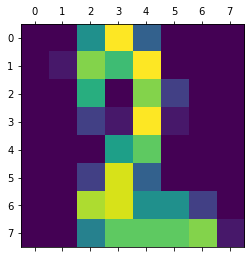

In [33]:
import matplotlib.pyplot as plt

digits = load_digits()
k = 22

plt.matshow(digits.images[k])
digits.target[k]

In [19]:
from sklearn.model_selection import cross_validate

rf_clf = RandomForestClassifier(n_estimators=100,)


ImportError: cannot import name 'RandomForestClassifiera' from 'sklearn.ensemble' (C:\Users\anton\.virtualenvs\_data-tejYZFn8\lib\site-packages\sklearn\ensemble\__init__.py)